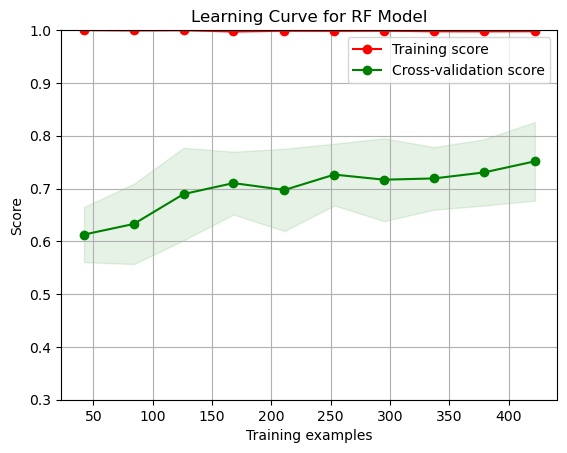

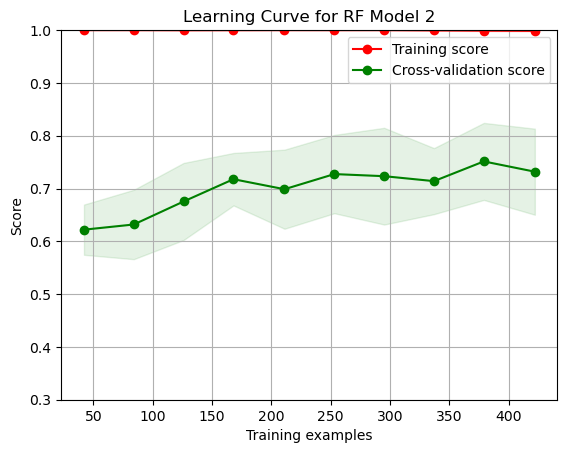

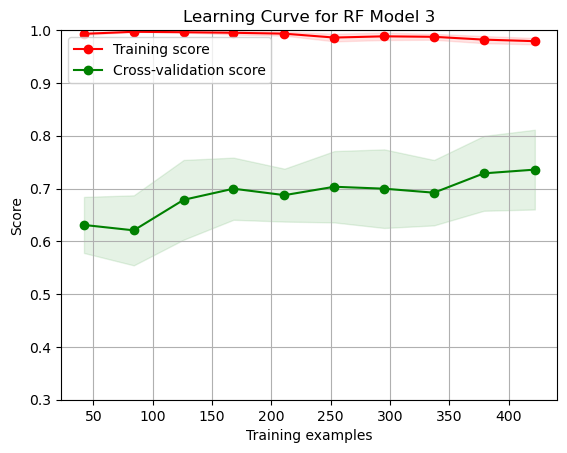

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from imblearn.pipeline import Pipeline

csv = pd.read_csv(r'E:\OneDrive\School\Technical Medicine\TM Jaar 1\Machine learning\TM10007_Machine_Learning_Group_4\TM\best_hyperparameters_smote.csv')
csv2 = pd.read_csv(r'E:\OneDrive\School\Technical Medicine\TM Jaar 1\Machine learning\TM10007_Machine_Learning_Group_4\TM\best_hyperparameters_smote2.csv')
csv3 = pd.read_csv(r'E:\OneDrive\School\Technical Medicine\TM Jaar 1\Machine learning\TM10007_Machine_Learning_Group_4\TM\TM10007_Machine_Learning_Group_4-1\best_hyperparameters_short.csv')

# Find the row where 'auc' is closest to its median value
best_params = csv.iloc[csv['auc'].idxmax()][['n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_samples', 'max_depth', 'bootstrap']]
best_params2 = csv2.iloc[csv2['auc'].idxmax()][['n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_samples', 'max_depth', 'bootstrap']]
best_params3 = csv3.iloc[csv3['auc'].idxmax()][['n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_samples', 'max_depth', 'bootstrap']]
# Load data
data_path = r'E:\OneDrive\School\Technical Medicine\TM Jaar 1\Machine learning\TM10007_Machine_Learning_Group_4\TM\ecg_data.csv'
data = pd.read_csv(data_path, index_col=0)

# Splitting features and labels
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

outer = range(0, 3000)
inner = range(0, 6)

best_params_list = {}


#prior split
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(
        x, y, test_size=0.2, stratify=y, shuffle=True, random_state=7)

# Create pipeline with SMOTE, PCA, and Random Forest
pipeline_RF = Pipeline([
    ('pca', PCA(n_components=0.99, random_state=7)),
    ('clf', RandomForestClassifier(**best_params, random_state=7, n_jobs=-1))
])

pipeline_RF2 = Pipeline([
    ('pca', PCA(n_components=0.99, random_state=7)),
    ('clf', RandomForestClassifier(**best_params2, random_state=7, n_jobs=-1))
])

pipeline_RF3 = Pipeline([
    ('pca', PCA(n_components=0.99, random_state=7)),
    ('clf', RandomForestClassifier(**best_params3, random_state=7, n_jobs=-1))
])




X_train, X_test, y_train, y_test = train_test_split(
        X_train_main, y_train_main, test_size=0.2, stratify=y_train_main, shuffle=True, random_state=7)

# Fit the pipeline to the training data
pipeline_RF.fit(X_train, y_train)
pipeline_RF2.fit(X_train, y_train)
pipeline_RF3.fit(X_train, y_train)


# Function to plot learning curve
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='roc_auc', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=7
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.legend(loc="best")
    plt.ylim(0.3, 1)
    plt.show()

# Plot learning curves for both models
plot_learning_curve(pipeline_RF, X_train, y_train, "Learning Curve for RF Model")
plot_learning_curve(pipeline_RF2, X_train, y_train, "Learning Curve for RF Model 2")
plot_learning_curve(pipeline_RF3, X_train, y_train, "Learning Curve for RF Model 3")